In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import yaml
import math
from scipy import stats

I want to import from config file:
    Equity Name
    Equity Price
    Volatility
  
I will produce a Surface Graph of Call Price vs Strike and Days to Expiry

In [3]:
with open('C:/Users/Sidney/Options Study/Options Final/Options.yml', 'r') as file:
    config=yaml.safe_load(file)

In [4]:
Name=config.get('general')
Parameters=config.get('parameters')

In [5]:
print(Name)
print(Parameters)
#Name is a dictionary with the name of the equity
#Parameters is a dictionary with the value of the parameters

{'filename': 'COIN'}
{'Price': 255.76, 'volatility': 0.39, 'Expy': 4}


Now I will make assignments to comply with the notation in the call formula

In [6]:
equity=Name.get('filename')
F=Parameters.get('Price')
sigma=Parameters.get('volatility')

print(equity,F,sigma)

COIN 255.76 0.39


In [7]:
"""
F is the equity price
K is the strike price
sigma is the volatility in percent divided by 100
""" 

'\nF is the equity price\nK is the strike price\nsigma is the volatility in percent divided by 100\n'

In [8]:
def d1(K,T):
    d1=(np.log(F/K)+0.5*(T/365)*sigma**2)/(sigma*(T/365)**0.5)
    return d1

In [9]:
def d2(K,T):
    d2=d1(K,T)-sigma*(T/365)**0.5
    return d2

In [10]:
def Call(K,T):
    Call=F*(stats.norm.cdf(d1(K,T)))-K*(stats.norm.cdf(d2(K,T)))
    return Call

For the 3D Surface, the x label will be Strike and the label will be Days to Expiray, z label Call Price

In [11]:
x_data=np.arange(F-0.2*F,F+0.2*F,0.1)

In [12]:
p=len(x_data)

In [13]:
y_data=np.linspace(1,30,len(x_data))

In [14]:
title='Call Price vs Strike and Days to Expy for %s at $%.0f' %(equity,F)
print(title)

Call Price vs Strike and Days to Expy for COIN at $256


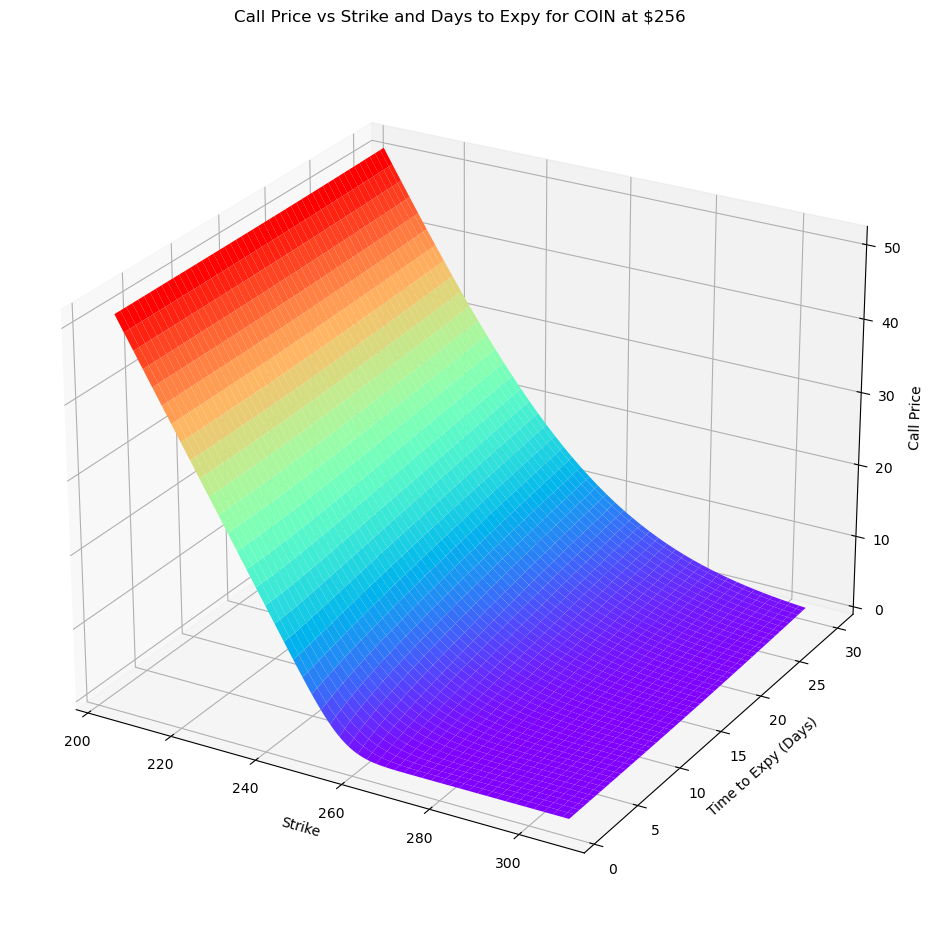

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig2=plt.figure(figsize=(10,10),dpi=100)
axes2=fig2.add_axes([0.1,0.1,0.9,0.9], projection='3d')
X,Y=np.meshgrid(x_data,y_data)
Z=Call(X,Y)
axes2.plot_surface(X,Y,Z, cmap='rainbow')
axes2.view_init(25,300)
#azimuth (first number above) is the angle of the x-y plane compared to horizontal)
#elevation (2nd number) is the 360 deg angle in the x-y plane to view
axes2.set_xlabel('Strike')
axes2.set_ylabel('Time to Expy (Days)')
axes2.set_zlabel('Call Price')
axes2.set_title(title)
#need title of plot
plt.show()

In [16]:
graph_title='Call vs Strike and Days to Expiry for %s at %.0f' %(equity,F)

In [19]:
fig2.savefig(graph_title, bbox_inches='tight')